# Average speed over limit (All Vehicle Types vs Coupe)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vehicle = pd.read_csv("2015-traffic-fatalities/vehicle.csv", encoding = 'unicode_escape')

vehicle

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,1,10001,1,1,1,1,1,2,40,35,...,0,0,14,13,99,1,4,1,1,1
1,1,10002,1,1,1,1,1,22,13,34,...,0,0,14,6,1,4,4,7,1,0
2,1,10003,1,1,2,1,1,1,25,42,...,0,0,1,13,1,1,4,1,1,1
3,1,10004,1,1,1,4,1,0,57,53,...,0,0,14,13,1,1,4,1,1,1
4,1,10005,1,2,1,7,1,7,9,12,...,0,0,11,15,1,1,1,68,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48918,56,560128,1,2,1,13,12,11,50,12,...,0,0,1,55,99,1,1,89,1,0
48919,56,560128,2,2,1,13,12,11,50,12,...,20,3,1,55,99,1,1,88,0,0
48920,56,560129,1,2,3,14,12,23,5,12,...,0,0,1,54,99,1,2,64,1,0
48921,56,560129,2,2,1,14,12,23,5,12,...,0,0,1,62,7,1,1,65,0,0


In [2]:
columns_to_keep = ['BODY_TYP',
                   'SPEEDREL',
                   'VSPD_LIM',
                   'TRAV_SP',
                    ]
#BODY_TYP = Body type classification of the vehicle
#SPEEDREL = Speed Related? !0 = Yes
#VSPD_LIM = Speed Limit
#TRAV_SP = Actual Travel Speed before Crash. 997 = Greater than 151mph, 998 = Not Reported, 999 = Unknown
vehiclecrash = vehicle[columns_to_keep]
vehiclecrash = pd.DataFrame(vehiclecrash)
vehiclecrash

,BODY_TYP,SPEEDREL,VSPD_LIM,TRAV_SP
0,31,0,55,55
1,4,4,70,70
2,4,0,55,80
3,31,0,55,75
4,3,0,65,15
...,...,...,...,...
48918,31,0,55,50
48919,31,0,45,999
48920,15,0,65,999
48921,66,0,65,65


# All Vehicle types

In [3]:
# BODY_TYP != 2: All vehicles excluding Coupe
allcrash = vehiclecrash[vehiclecrash['BODY_TYP'] != 2]

# We only want Speed-related accidents:
# SPEEDREL != 0: All crash resulted from Speeding
allcrash = allcrash[allcrash['SPEEDREL'] != 0]

# Filter out TRAV_SP greater than 151mph
#997 = Greater than 151mph, 998 = Not Reported, 999 = Unknown
allcrash = allcrash[allcrash['TRAV_SP'] < 151]

allcrash

,BODY_TYP,SPEEDREL,VSPD_LIM,TRAV_SP
1,4,4,70,70
17,4,3,45,80
19,31,3,45,65
24,14,3,30,55
30,15,3,55,75
...,...,...,...,...
48897,4,3,65,112
48904,31,3,65,75
48906,31,4,35,50
48914,31,3,65,96


In [4]:
allcrash = allcrash.sort_values('BODY_TYP')
print(allcrash.BODY_TYP.value_counts())

4     1174
80     595
31     510
14     403
15     149
30     128
66     127
6       83
20      76
3       71
5       45
21      36
1       35
63      29
90      25
99      21
16      21
62      13
9       11
67       9
81       8
40       7
97       6
83       4
61       4
49       3
92       3
22       3
32       3
88       2
8        2
91       2
29       2
93       1
10       1
89       1
28       1
65       1
7        1
52       1
64       1
51       1
72       1
78       1
73       1
17       1
50       1
Name: BODY_TYP, dtype: int64


In [5]:
# Add 'SPEED_OVER' column to track how much TRAV_SP over VSPD_LIM 
allcrash['SPEED_OVER'] = allcrash.apply(lambda x: x.TRAV_SP - x.VSPD_LIM, axis=1)
# Discard all without SPEED_OVER
allcrash = allcrash[allcrash['SPEED_OVER'] > 0]

# Discard Body Types with less than 10 accidents reported
allcrash = allcrash[allcrash.groupby('BODY_TYP').BODY_TYP.transform('count')>10].copy() 

allcrash


,BODY_TYP,SPEEDREL,VSPD_LIM,TRAV_SP,SPEED_OVER
27490,1,3,70,95,25
38677,1,4,45,75,30
27301,1,3,45,80,35
27312,1,3,35,39,4
32887,1,4,40,50,10
...,...,...,...,...,...
37583,80,4,55,60,5
12353,80,3,45,63,18
4488,80,4,45,80,35
37857,80,3,35,57,22


In [6]:
print(allcrash.BODY_TYP.value_counts())

4     862
80    459
31    362
14    278
15    100
30     75
6      58
3      53
20     45
1      31
5      27
66     27
21     18
16     17
Name: BODY_TYP, dtype: int64


In [7]:
min = allcrash.min()
min

BODY_TYP      1
SPEEDREL      2
VSPD_LIM      0
TRAV_SP       8
SPEED_OVER    1
dtype: int64

In [8]:
max = allcrash.max()
max

BODY_TYP       80
SPEEDREL        9
VSPD_LIM       80
TRAV_SP       140
SPEED_OVER    115
dtype: int64

In [9]:
# Grabs mean of SPEED_OVER of every BODY_TYP
allcrash_speedover = allcrash.groupby('BODY_TYP', as_index=False)['SPEED_OVER'].mean()
allcrash_speedover

,BODY_TYP,SPEED_OVER
0,1,27.032258
1,3,26.867925
2,4,26.045244
3,5,27.185185
4,6,19.448276
5,14,21.935252
6,15,21.870000
7,16,17.941176
8,20,16.244444
9,21,17.277778


In [10]:
all_crash_avg_speed_over = allcrash['SPEED_OVER'].mean()
print("Average Speed over limit by all vehicle-types EXCLUDING Coupe: ", "%.2f" % all_crash_avg_speed_over, "mph") 

Average Speed over limit by all vehicle-types EXCLUDING Coupe:  24.24 mph


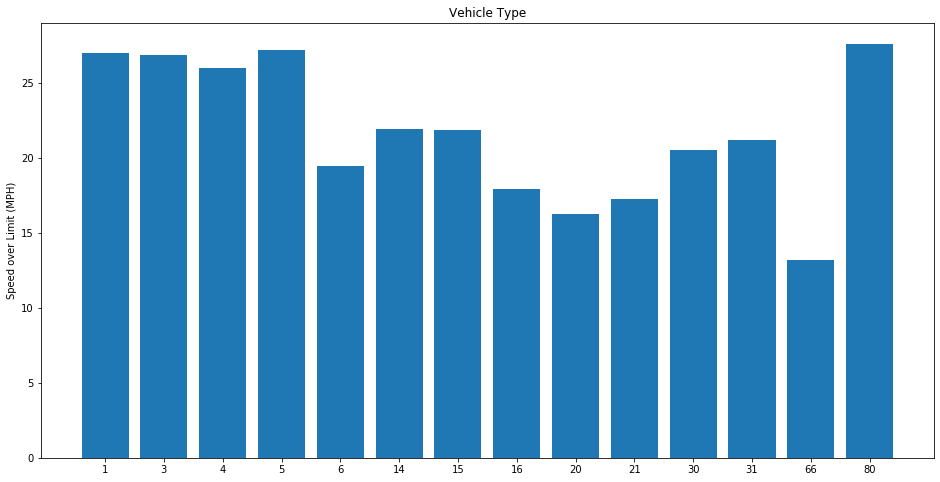

In [11]:
allcrash_speedover['BODY_TYP']

fig, ax = plt.subplots(figsize=(16, 8))

objects = allcrash_speedover['BODY_TYP']
y_pos = np.arange(len(objects))
speed = allcrash_speedover['SPEED_OVER']

plt.bar(y_pos, speed, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Speed over Limit (MPH)')
plt.title('Vehicle Type')


plt.show()

# Coupe

With the average speed of all vehicle-type crashes, we repeat the process except for Coupes exclusively.

In [12]:
coupe = vehiclecrash[vehiclecrash['BODY_TYP'] == 2]


#BODY_TYP 2 refers to 2-door sedan, hardtop, coupe

#SPEEDREL != 0: Speed related crash
# 0: No
# 1: Yes
# 2: Yes, Racing
# 3: Yes, Exceed Speed Limit
# 4: Yes, Too Fast for Condition
# 5: Yes, Specifics Unknown

coupe = coupe[coupe['SPEEDREL'] != 0]
#TRAV_SP = Actual mph. 
#997 = Greater than 151mph, 998 = Not Reported, 999 = Unknown
coupe = coupe[coupe['TRAV_SP'] < 151]

coupe

,BODY_TYP,SPEEDREL,VSPD_LIM,TRAV_SP
148,2,3,45,85
267,2,3,45,75
610,2,4,40,95
615,2,3,45,90
703,2,3,65,71
...,...,...,...,...
48276,2,3,70,75
48364,2,3,45,90
48485,2,3,45,97
48828,2,2,55,85


In [13]:
# Add 'SPEED_OVER' column to track how much TRAV_SP over VSPD_LIM 
coupe['SPEED_OVER'] = coupe.apply(lambda x: x.TRAV_SP - x.VSPD_LIM, axis=1)
# Discard all without SPEED_OVER
coupe = coupe[coupe['SPEED_OVER'] > 0]
coupe

,BODY_TYP,SPEEDREL,VSPD_LIM,TRAV_SP,SPEED_OVER
148,2,3,45,85,40
267,2,3,45,75,30
610,2,4,40,95,55
615,2,3,45,90,45
703,2,3,65,71,6
...,...,...,...,...,...
48276,2,3,70,75,5
48364,2,3,45,90,45
48485,2,3,45,97,52
48828,2,2,55,85,30


In [14]:
print(coupe.BODY_TYP.value_counts())

2    259
Name: BODY_TYP, dtype: int64


In [15]:
# Grabs mean of SPEED_OVER of Coupe
coupe_speedover = coupe.groupby('BODY_TYP', as_index=False)['SPEED_OVER'].mean()
coupe_speedover

,BODY_TYP,SPEED_OVER
0,2,31.822394


In [16]:
coupe_avg_speed_over = coupe['SPEED_OVER'].mean()
print("Average Speed over limit by Coupe: ", "%.2f" % coupe_avg_speed_over, "mph") 

Average Speed over limit by Coupe:  31.82 mph


# Conclusion: Average Speed-over All vehicles vs Coupe

In [17]:
#Merge All-Vehicle & Coupe
result = allcrash_speedover.append(coupe_speedover)
result

,BODY_TYP,SPEED_OVER
0,1,27.032258
1,3,26.867925
2,4,26.045244
3,5,27.185185
4,6,19.448276
5,14,21.935252
6,15,21.870000
7,16,17.941176
8,20,16.244444
9,21,17.277778


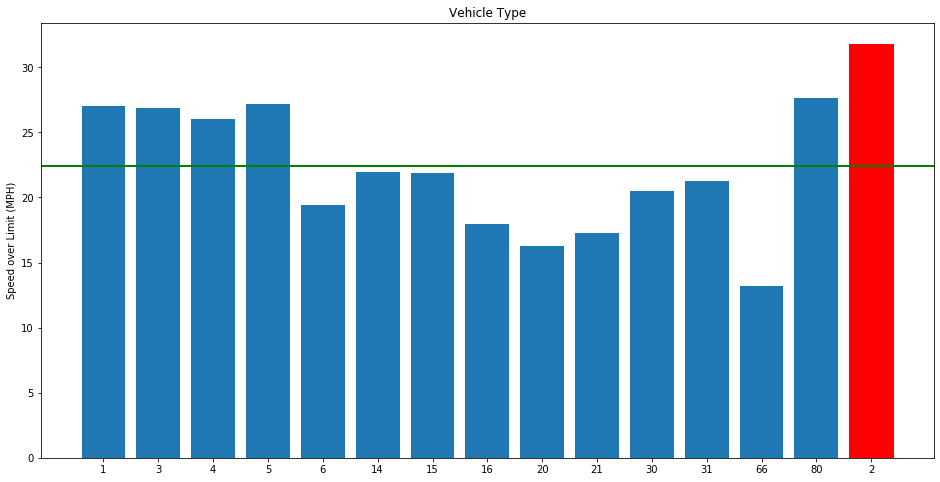

In [18]:
objects = result['BODY_TYP']
y_pos = np.arange(len(objects))
speed = result['SPEED_OVER']

fig, ax = plt.subplots(figsize=(16, 8))

#matplotlib.pyplot.bar(x-coordinates, height of bars, Center the base on the x positions, data=None, **kwargs)
barlist = plt.bar(y_pos, speed, align='center')
# Set Coupe as Red
barlist[-1].set_color('r')
# Average
plt.axhline(y=result['SPEED_OVER'].mean(), linewidth=2, color='g')



plt.xticks(y_pos, objects)
plt.ylabel('Speed over Limit (MPH)')
plt.title('Vehicle Type')


plt.show()

### Vehicle Code
1. Convertible
3. 3-Door/2-Door Hatchback
4. 4-Door Sedan/Hardtop
5. 5-Door/4-Door Hatchback
6. Station Wagon (Excluding Van and Truck-Based)
14. Compact Utility (ANSI D-16 Utility Vehicle Categories “Small” and “Midsize”)
15. Large Utility (ANSI D-16 Utility Vehicle Categories “Full Size” and “Large”)
16. Utility Station Wagon
20. Minivan
21. Large Van – Includes Van-Based Buses
30. Compact Pickup (Gross Vehicle Weight, GVWR, < 4,500 lbs)
31. Standard Pickup (4,500lbs - 10,000lbs)
66. Truck/Tractor (Cab Only, or with Any Number of Trailing Units: Any Weight)
80. Motorcycle

2. Coupe


In [19]:
print("Average Speed over limit by all vehicle-types EXCLUDING Coupe: ", "%.2f" % all_crash_avg_speed_over, "mph") 
print("Average Speed over limit by Coupe: ", "%.2f" % coupe_avg_speed_over, "mph") 

Average Speed over limit by all vehicle-types EXCLUDING Coupe:  24.24 mph
Average Speed over limit by Coupe:  31.82 mph


In [20]:
speed_difference = coupe_avg_speed_over - all_crash_avg_speed_over
print("Among all speed-related crashes, on average, Coupes speed ", "%.2f" % speed_difference, "mph more than all vehicle-types")

Among all speed-related crashes, on average, Coupes speed  7.58 mph more than all vehicle-types
